In [39]:
import pandas as pd

In [40]:
df=pd.read_csv("./IMDB-Movie-Data.csv")
df

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0


In [41]:
df.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [42]:
df['Genre'].value_counts()

Genre
Action,Adventure,Sci-Fi    50
Drama                      48
Comedy,Drama,Romance       35
Comedy                     32
Drama,Romance              31
                           ..
Action,Comedy,Family        1
Action,Crime,Fantasy        1
Comedy,Mystery              1
Adventure,Comedy,Horror     1
Comedy,Family,Fantasy       1
Name: count, Length: 207, dtype: int64

In [43]:
df["Genre"]=df['Genre'].apply(lambda x:x.split(","))
df_exploded_genre = df.explode('Genre')
genre_revenue = df_exploded_genre.groupby('Genre')['Revenue (Millions)'].mean()
sorted_genre_revenue = genre_revenue.sort_values(ascending=False)
sorted_genre_revenue

Genre
Animation    191.223404
Adventure    154.177024
Sci-Fi       135.552545
Fantasy      131.850108
Family       126.175714
Action       124.494476
Western      111.824000
Musical       81.642000
Comedy        75.750784
Thriller      69.577255
Sport         65.042500
Crime         61.804769
Biography     55.801600
Mystery       54.627640
War           53.433000
History       52.923846
Drama         49.844205
Music         47.070000
Romance       42.503023
Horror        36.705269
Name: Revenue (Millions), dtype: float64

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

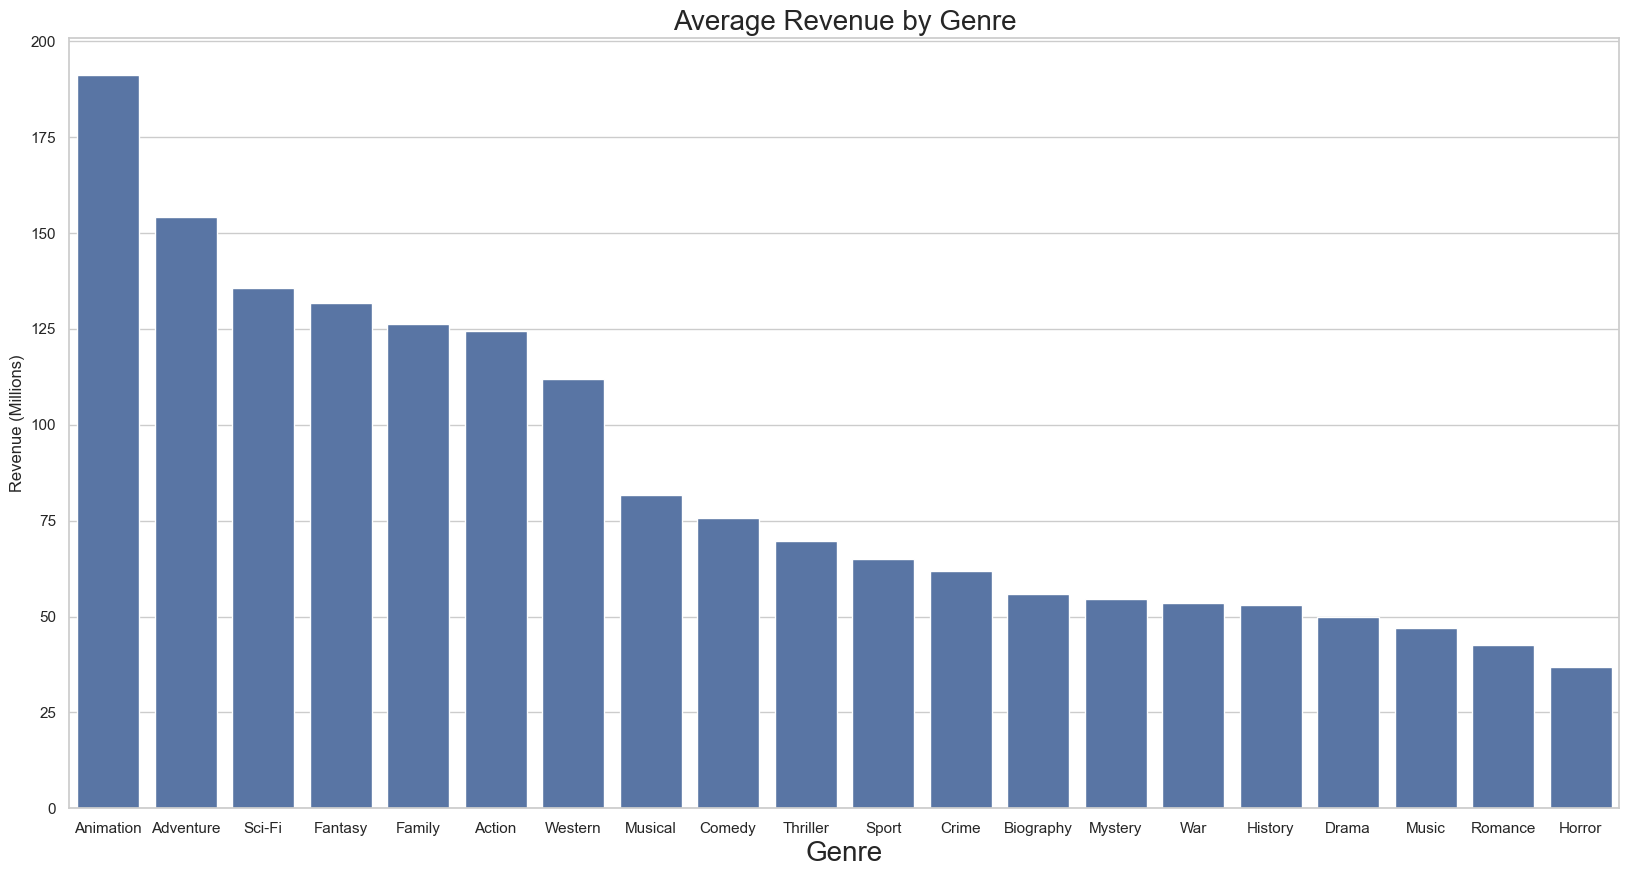

In [45]:
sns.set_theme(style="whitegrid", palette="deep")
plt.subplots(figsize=(20, 10))
bar_plot=sns.barplot(sorted_genre_revenue)
bar_plot.set_title('Average Revenue by Genre', fontsize=20)
bar_plot.set_xlabel('Genre', fontsize=20)
plt.show()

In [46]:
df["Actors"]=df['Actors'].apply(lambda x: x.replace("'", "").split(','))

df_exploded_actor = df.explode('Actors')
df_exploded_actor['Actors']=df_exploded_actor['Actors'].apply(lambda x:x.strip())
df_exploded_actor

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"[Action, Adventure, Sci-Fi]",A group of intergalactic criminals are forced ...,James Gunn,Chris Pratt,2014,121,8.1,757074,333.13,76.0
0,1,Guardians of the Galaxy,"[Action, Adventure, Sci-Fi]",A group of intergalactic criminals are forced ...,James Gunn,Vin Diesel,2014,121,8.1,757074,333.13,76.0
0,1,Guardians of the Galaxy,"[Action, Adventure, Sci-Fi]",A group of intergalactic criminals are forced ...,James Gunn,Bradley Cooper,2014,121,8.1,757074,333.13,76.0
0,1,Guardians of the Galaxy,"[Action, Adventure, Sci-Fi]",A group of intergalactic criminals are forced ...,James Gunn,Zoe Saldana,2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"[Adventure, Mystery, Sci-Fi]","Following clues to the origin of mankind, a te...",Ridley Scott,Noomi Rapace,2012,124,7.0,485820,126.46,65.0
...,...,...,...,...,...,...,...,...,...,...,...,...
998,999,Search Party,"[Adventure, Comedy]",A pair of friends embark on a mission to reuni...,Scot Armstrong,Shannon Woodward,2014,93,5.6,4881,NaN,22.0
999,1000,Nine Lives,"[Comedy, Family, Fantasy]",A stuffy businessman finds himself trapped ins...,Barry Sonnenfeld,Kevin Spacey,2016,87,5.3,12435,19.64,11.0
999,1000,Nine Lives,"[Comedy, Family, Fantasy]",A stuffy businessman finds himself trapped ins...,Barry Sonnenfeld,Jennifer Garner,2016,87,5.3,12435,19.64,11.0
999,1000,Nine Lives,"[Comedy, Family, Fantasy]",A stuffy businessman finds himself trapped ins...,Barry Sonnenfeld,Robbie Amell,2016,87,5.3,12435,19.64,11.0


In [47]:
df_exploded_actor['Actors'].describe()

count              3999
unique             1985
top       Mark Wahlberg
freq                 15
Name: Actors, dtype: object

In [48]:
df_exploded_actor['Actors'].value_counts()

Actors
Mark Wahlberg        15
Hugh Jackman         14
Christian Bale       13
Brad Pitt            13
Channing Tatum       12
                     ..
Lucy Walters          1
Brenda Blethyn        1
Gretchen Mol          1
Genesis Rodriguez     1
Cheryl Hines          1
Name: count, Length: 1985, dtype: int64

In [49]:
actors_revenue = df_exploded_actor.groupby('Actors')['Revenue (Millions)'].sum()
actors_revenue.dropna()

Actors
50 Cent                   25.12
A.C. Peterson              0.00
AJ Michalka              126.98
Aamir Khan                29.44
Aaron Burns                7.22
                          ...  
Zoë Bell                  25.03
Zoë Kravitz              153.63
Émilie Leclerc            10.14
Ólafur Darri Ólafsson     27.36
Óscar Jaenada             55.12
Name: Revenue (Millions), Length: 1985, dtype: float64

In [50]:
df.isna().sum()

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

In [51]:
sorted_actors_revenue = actors_revenue.sort_values(ascending=False)
sorted_actors_revenue.dropna()[0:9]

Actors
Robert Downey Jr.     3147.37
Jennifer Lawrence     2191.82
Chris Evans           1949.01
Scarlett Johansson    1874.97
Johnny Depp           1789.20
Shia LaBeouf          1695.93
Christian Bale        1653.19
Anne Hathaway         1647.47
Liam Hemsworth        1641.60
Name: Revenue (Millions), dtype: float64

In [52]:
df['Year'].value_counts()

Year
2016    297
2015    127
2014     98
2013     91
2012     64
2011     63
2010     60
2007     53
2008     52
2009     51
2006     44
Name: count, dtype: int64

In [53]:
max_revenue_per_year = df.groupby('Year')['Revenue (Millions)'].max().reset_index()
result= pd.merge(max_revenue_per_year,df,on=['Year', 'Revenue (Millions)'])
result.dropna()
unneeded = ['Rank','Description','Actors','Runtime (Minutes)','Rating','Votes']
result = result.drop(columns=unneeded)
result

,Year,Revenue (Millions),Title,Genre,Director,Metascore
0,2006,423.03,Pirates of the Caribbean: Dead Man's Chest,"[Action, Adventure, Fantasy]",Gore Verbinski,53.0
1,2007,336.53,Spider-Man 3,"[Action, Adventure]",Sam Raimi,59.0
2,2008,533.32,The Dark Knight,"[Action, Crime, Drama]",Christopher Nolan,82.0
3,2009,760.51,Avatar,"[Action, Adventure, Fantasy]",James Cameron,83.0
4,2010,414.98,Toy Story 3,"[Animation, Adventure, Comedy]",Lee Unkrich,92.0
5,2011,380.96,Harry Potter and the Deathly Hallows: Part 2,"[Adventure, Drama, Fantasy]",David Yates,87.0
6,2012,623.28,The Avengers,"[Action, Sci-Fi]",Joss Whedon,69.0
7,2013,424.65,The Hunger Games: Catching Fire,"[Action, Adventure, Mystery]",Francis Lawrence,76.0
8,2014,350.12,American Sniper,"[Action, Biography, Drama]",Clint Eastwood,72.0
9,2015,936.63,Star Wars: Episode VII - The Force Awakens,"[Action, Adventure, Fantasy]",J.J. Abrams,81.0


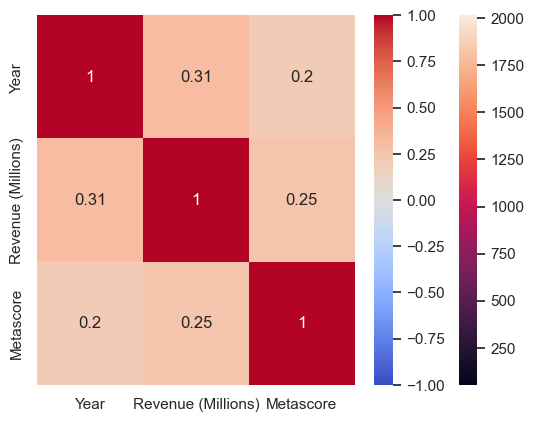

In [54]:
sns.heatmap(result.drop(columns=['Title','Genre','Director']))
sns.heatmap(result.drop(columns=['Title','Genre','Director']).corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

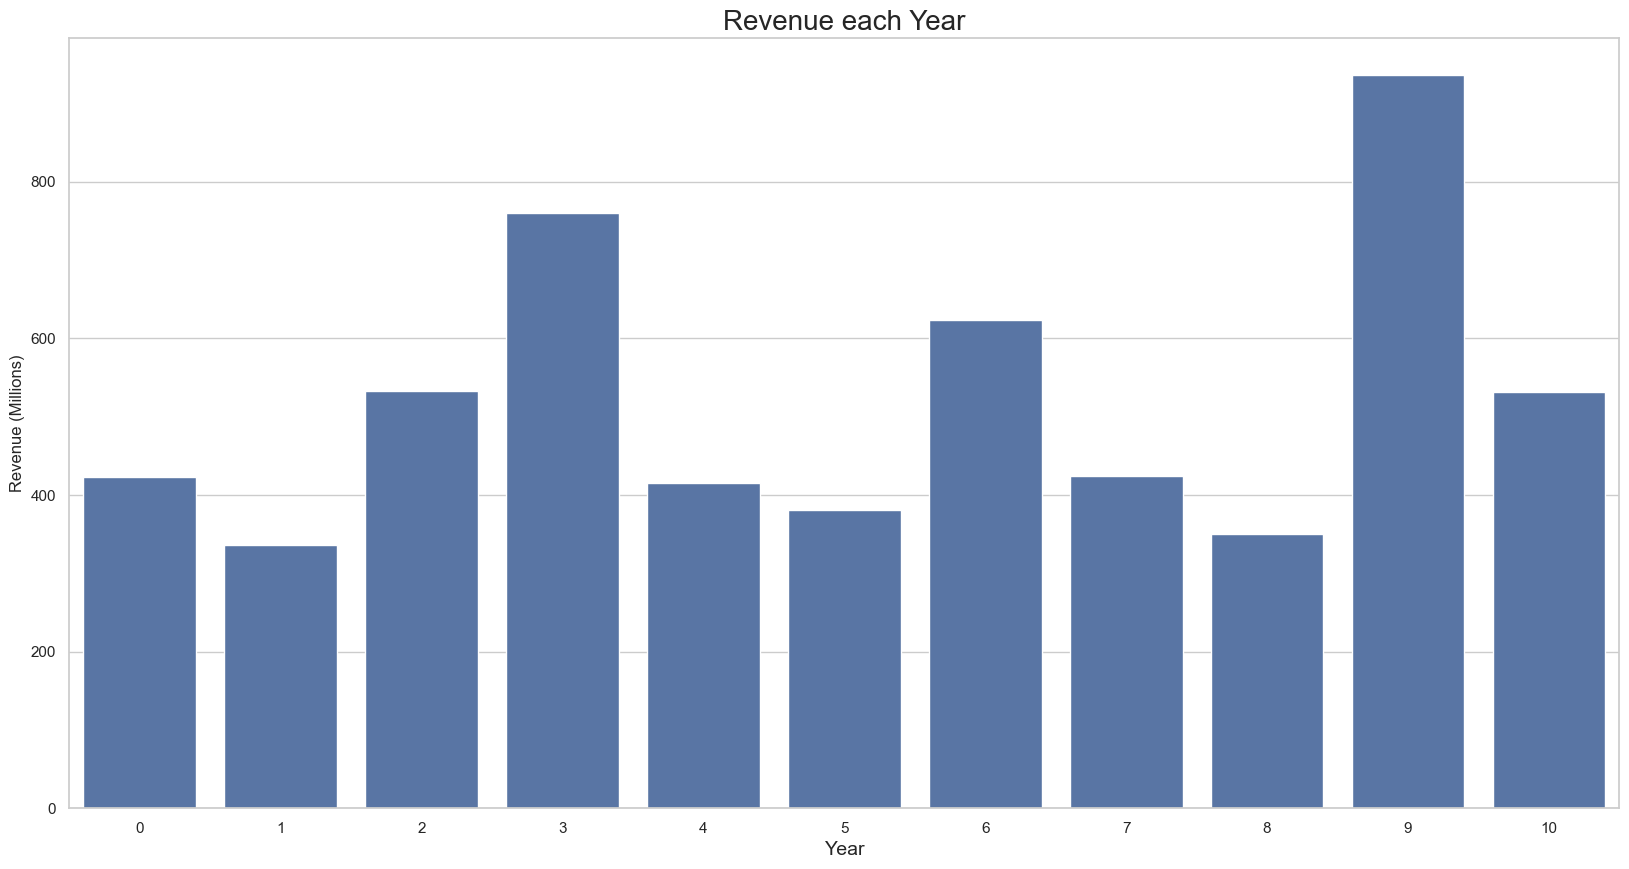

In [56]:
sns.set_theme(style="whitegrid", palette="deep")
plt.subplots(figsize=(20, 10))
bar_plot=sns.barplot(result['Revenue (Millions)'])
bar_plot.set_title('Revenue each Year', fontsize=20)
bar_plot.set_xlabel('Year', fontsize=14)
plt.show()

In [57]:
df['Director'].value_counts()
dir_revenue=df.groupby('Director')['Revenue (Millions)'].sum()
dir_revenue.sort_values(ascending=False)[0:9]

Director
J.J. Abrams          1683.45
David Yates          1630.51
Christopher Nolan    1515.09
Michael Bay          1421.32
Francis Lawrence     1299.81
Joss Whedon          1082.27
Jon Favreau          1025.60
Zack Snyder           975.74
Peter Jackson         860.45
Name: Revenue (Millions), dtype: float64

In [77]:
genre_per_rating=df_exploded_genre.groupby("Genre")["Votes"].max().reset_index()
temp = df_exploded_genre[['Title','Rating',"Metascore","Revenue (Millions)","Genre","Votes"]]
temp

,Title,Rating,Metascore,Revenue (Millions),Genre,Votes
0,Guardians of the Galaxy,8.1,76.0,333.13,Action,757074
0,Guardians of the Galaxy,8.1,76.0,333.13,Adventure,757074
0,Guardians of the Galaxy,8.1,76.0,333.13,Sci-Fi,757074
1,Prometheus,7.0,65.0,126.46,Adventure,485820
1,Prometheus,7.0,65.0,126.46,Mystery,485820
...,...,...,...,...,...,...
998,Search Party,5.6,22.0,NaN,Adventure,4881
998,Search Party,5.6,22.0,NaN,Comedy,4881
999,Nine Lives,5.3,11.0,19.64,Comedy,12435
999,Nine Lives,5.3,11.0,19.64,Family,12435


In [78]:
genre_per_rating=pd.merge(genre_per_rating,temp,on =["Genre","Votes"])
genre_per_rating

,Genre,Votes,Title,Rating,Metascore,Revenue (Millions)
0,Action,1791916,The Dark Knight,9.0,82.0,533.32
1,Adventure,1583625,Inception,8.8,74.0,292.57
2,Animation,776897,WALL·E,8.4,NaN,223.81
3,Biography,865134,The Wolf of Wall Street,8.2,75.0,116.87
4,Comedy,865134,The Wolf of Wall Street,8.2,75.0,116.87
5,Crime,1791916,The Dark Knight,9.0,82.0,533.32
6,Drama,1791916,The Dark Knight,9.0,82.0,533.32
7,Family,776897,WALL·E,8.4,NaN,223.81
8,Fantasy,935408,Avatar,7.8,83.0,760.51
9,History,486338,12 Years a Slave,8.1,96.0,56.67


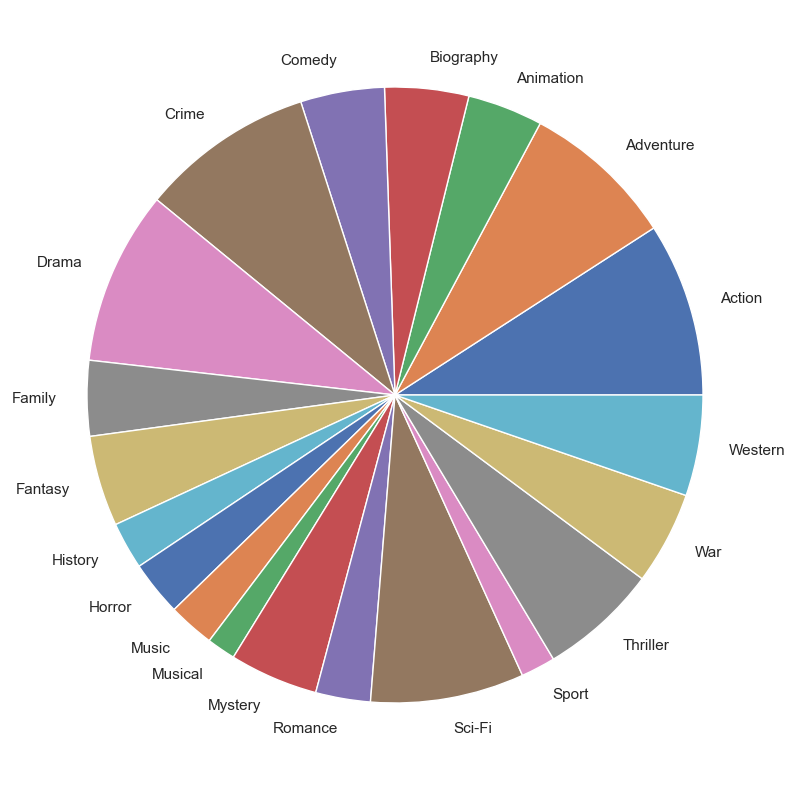

In [83]:
plt.subplots(figsize=(20, 10))
plt.pie(genre_per_rating['Votes'],labels=genre_per_rating['Genre'])
plt.show()